In [7]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
#importing the dataset
data = pd.read_csv('Fertilizer Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [10]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [11]:
#checking unique values
data.nunique()

Temparature    14
Humidity       13
Moisture       41
Soil_Type       5
Crop_Type      11
Nitrogen       24
Potassium      13
Phosphorous    32
Fertilizer      7
dtype: int64

In [12]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [13]:
data['Fertilizer'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [14]:
data['Crop_Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [15]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,99.000000,99.000000,99.000000,99,99,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Loamy,Sugarcane,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,21,13,NaN,NaN,NaN,22
mean,30.282828,59.151515,43.181818,NaN,NaN,18.909091,3.383838,18.606061,NaN
std,3.502304,5.840331,11.271568,NaN,NaN,11.599693,5.814667,13.476978,NaN
min,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN
25%,28.000000,54.000000,34.000000,NaN,NaN,10.000000,0.000000,9.000000,NaN
50%,30.000000,60.000000,41.000000,NaN,NaN,13.000000,0.000000,19.000000,NaN
75%,33.000000,64.000000,50.500000,NaN,NaN,24.000000,7.500000,30.000000,NaN


Text(0.5, 1.0, 'relation of soil type and Temperature with output variable')

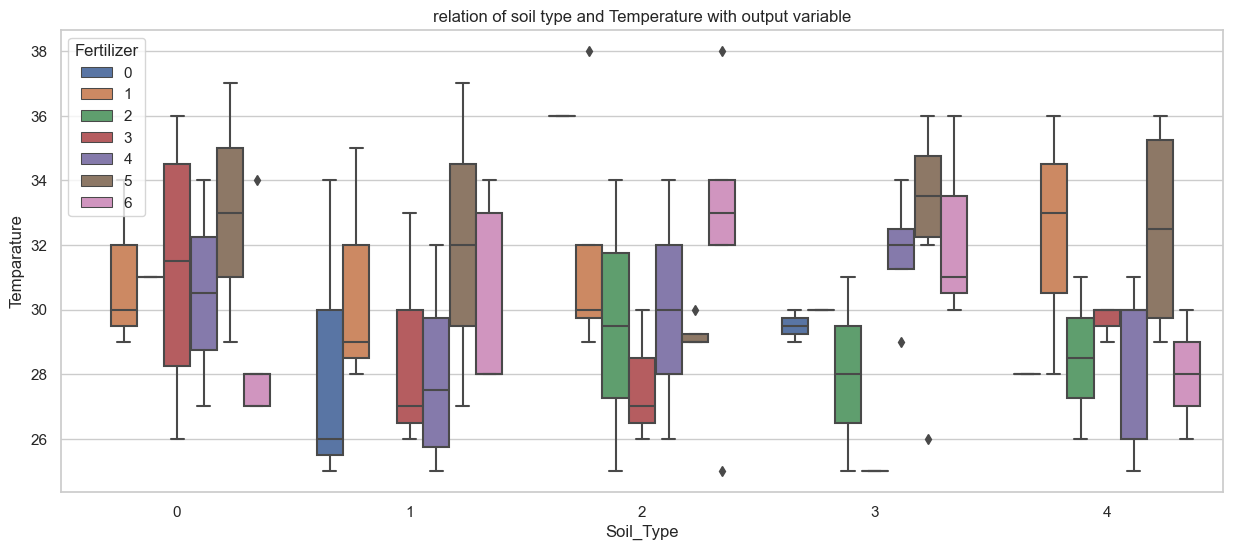

In [44]:
#relation of soil type and Temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Soil_Type,y=data.Temparature,hue=data.Fertilizer)
plt.title('relation of soil type and Temperature with output variable')

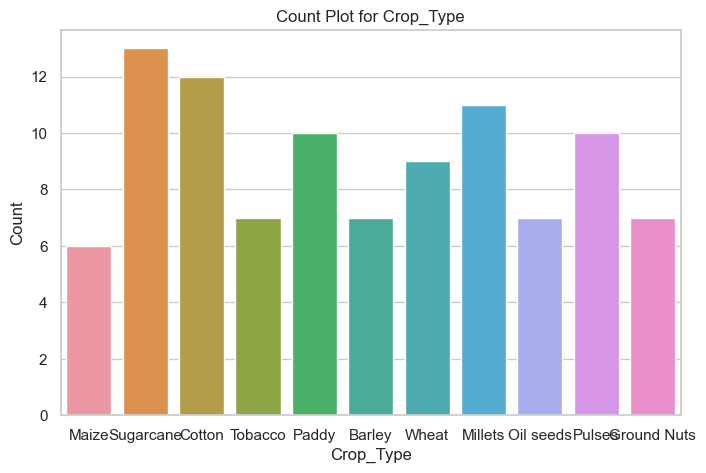

In [19]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

In [ ]:
#The plot that shows the count (frequency) of each unique crop type in the dataset
#The x-axis represents the different crop types.
#The y-axis represents the count (the number of occurrences) of each crop type in the dataset

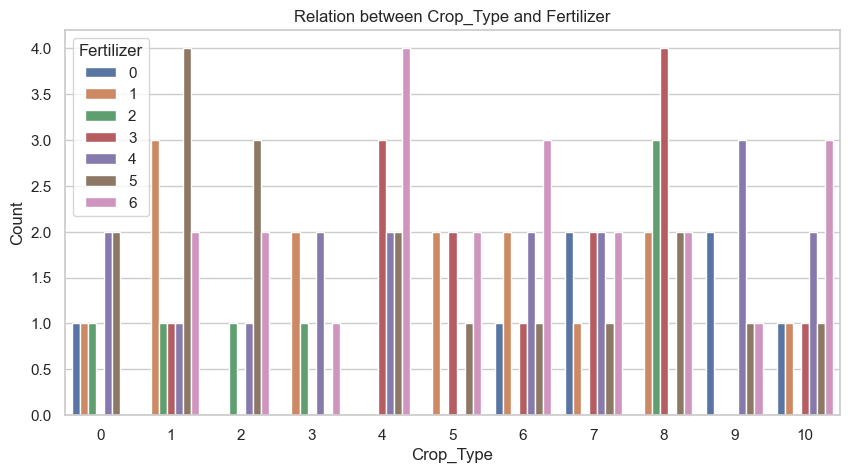

In [42]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x='Crop_Type', hue='Fertilizer')
plt.title('Relation between Crop_Type and Fertilizer')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.show()

In [ ]:
#  this plot is provides insights into how different crop types are distributed based on the type of fertilizer used.
# The x-axis represents the different crop types.
# The y-axis represents the count (the number of occurrences) of each crop type in the dataset.

<Axes: >

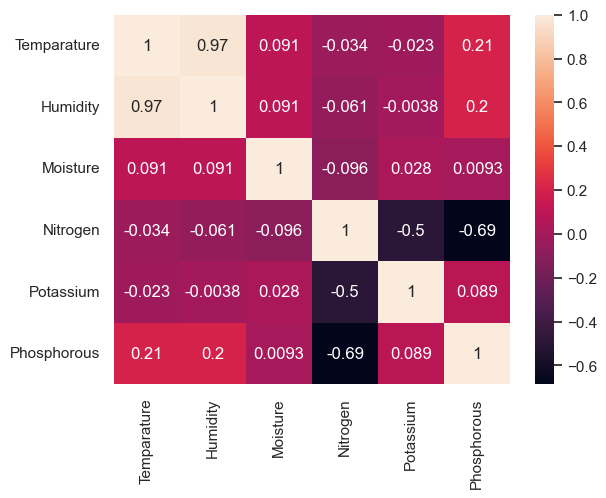

In [20]:
#Heatmap for Correlation Analysis
sns.heatmap(data.corr(),annot=True)

In [ ]:
T#here is high correaltion between the humidity and temparature variable and other variable were not majorly correlated 

In [21]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#it  transforming non-numeric data into a numeric format

In [22]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [23]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [24]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [25]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [ ]:
# here 20% of the data should be used for testing (evaluation), and the remaining 80% is used for training
#x_train and x_test = contain the features (independent variables) used for training and testing the model
#y_train and y_test = contains the labels(dependent variable) used for training and testing the model.

In [26]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil_Type    79 non-null     int32
 4   Crop_Type    79 non-null     int32
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int32(2), int64(6)
memory usage: 4.9 KB


In [27]:
acc = []
model = []

### Logistic regression model

In [28]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

ds = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
ds.fit(x_train,y_train)

predicted_values = ds.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  75.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.75        20
   macro avg       0.64      0.71      0.67        20
weighted avg       0.68      0.75      0.70        20



In [29]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [30]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
# transform testing dataabs
X_test_norm = norm.transform(x_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.85
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.85        20
   macro avg       0.83      0.83      0.83        20
weighted avg       0.86      0.85      0.85        20



In [31]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.85
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.85        20
   macro avg       0.87      0.83      0.82        20
weighted avg       0.89      0.85      0.84        20



In [34]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(RF,data,data.Fertilizer,cv=5)
print("Cross-validation score of RF is:",score)
score = cross_val_score(LogReg,data,data.Fertilizer,cv=5)
print("Cross-validation score of LogReg is:",score)
score = cross_val_score(SVM,data,data.Fertilizer,cv=5)
print("Cross-validation score of SVM is:",score)
score = cross_val_score(NaiveBayes,data,data.Fertilizer,cv=5)
print("Cross-validation score of NaiveBayes is:",score)
score = cross_val_score(ds, data, data.Fertilizer,cv=5)
print("Cross-validation score of ds is:",score)

Cross-validation score of RF is: [1. 1. 1. 1. 1.]
Cross-validation score of LogReg is: [0.95 1.   1.   1.   1.  ]
Cross-validation score of SVM is: [0.95 1.   0.95 0.9  1.  ]
Cross-validation score of NaiveBayes is: [1. 1. 1. 1. 1.]
Cross-validation score of ds is: [0.95 1.   1.   1.   1.  ]


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

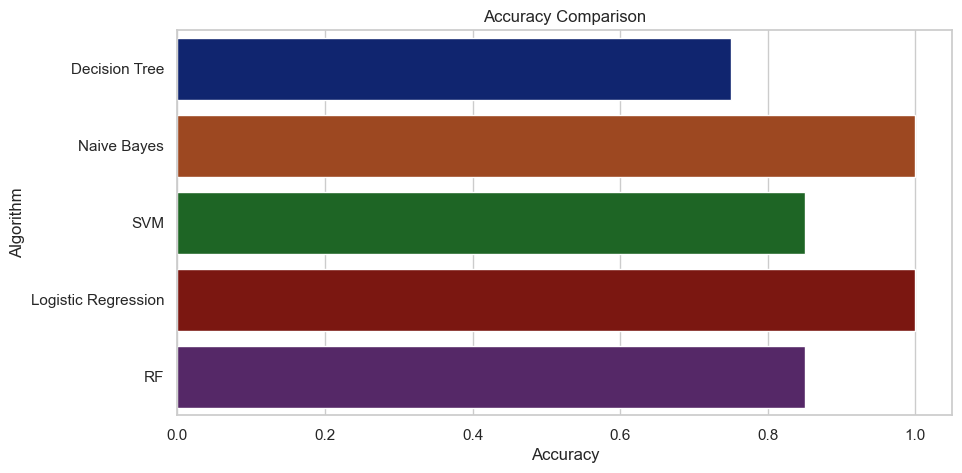

In [35]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [36]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(NaiveBayes,pickle_out)
pickle_out.close()

In [37]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[34,67,62,0,1,7,0,30]])

array([5])

In [38]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[25,78,43,4,1,22,26,38]])

array([1])

In [39]:
y_train

2     1
44    5
59    5
55    4
19    5
     ..
75    1
9     1
72    4
12    6
37    5
Name: Fertilizer, Length: 79, dtype: int32

In [40]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [41]:
ferti = pickle.load(open('fertilizer.pkl','rb'))
ferti.classes_[1]

'14-35-14'